In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

In [2]:
#read the data

cars=pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.isna().sum()#check missing value

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


Correlation Matrix

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatterplot between variables along with histograms

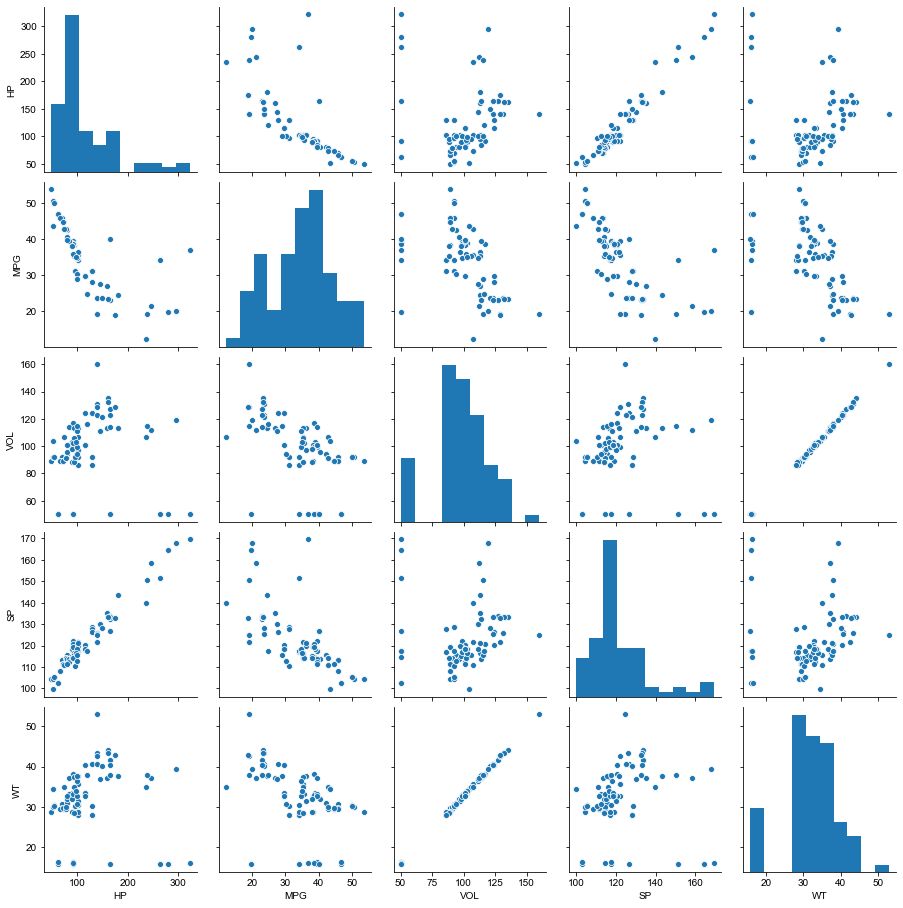

In [7]:
sns.pairplot(cars)#scatter plot for all the variables
sns.set_style(style='darkgrid')

##Preparing the Model

In [10]:
#build model
#Y=Bo+B1x1+B2x2+B3x3+B4x4+e
#MPG=Bo+B1.HP+B2.Vol+B3.WT+B4.SP
import statsmodels.formula.api as smf
model=smf.ols('MPG~HP+VOL+WT+SP',data=cars).fit()
model


In [11]:
model.params#Coefficient,Bo,B1,B2,B3,B4

Intercept    30.677336
HP           -0.205444
VOL          -0.336051
WT            0.400574
SP            0.395627
dtype: float64

In [12]:
print(model.tvalues, '\n' ,model.pvalues)

Intercept    2.058841
HP          -5.238735
VOL         -0.590970
WT           0.236541
SP           2.499880
dtype: float64 
 Intercept    0.042936
HP           0.000001
VOL          0.556294
WT           0.813649
SP           0.014579
dtype: float64


#here in pvalue Vol=0.55 and WT=0.81 and both values are greater than alpha (0.05)

In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

here R squared value is fairly good but not the excellent .Model can give the error upto 23 % .for that we have to increase the model prediction towards good position.
We can see that the Vol & Wt are not giving the significant contibution in the target value.We can see it in correlation and scatter plot that both are giving strong reationship in each other so that they are cancelling each other effect and we see in the MLR assumption that variables shuold independent in each other.
  So for that we will do colliniarity here to see how they both are effecting target value MPG 

# Colliniarity

Simple linear Regression

In [14]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()#model vol

In [15]:
print(ml_v.tvalues, '\n',ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


here pvalue is less than 0.05 it means vol is showing there effects on MPG

In [16]:
ml_w=smf.ols('MPG~WT',data=cars).fit()# model wt

In [17]:
print(ml_w.tvalues,'\n',ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


here also pvalue is less than 0.05 it means wt is showing there effects on MPG

In [19]:
#combining both
ml_vw=smf.ols('MPG~VOL+WT',data=cars).fit()
print(ml_vw.tvalues,'\n',ml_vw.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 
 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


here vol=0.48 & WT=0.625 and both value are greter than alpha.
When they are combining each other then they are cancelling each other effect

now we did SLR method and learn the both value are making something differnt , now we will used VIF method

In [ ]:
VIF=